In [ ]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet.git

fatal: destination path 'Brain-Tumor-Classification-DataSet' already exists and is not an empty directory.


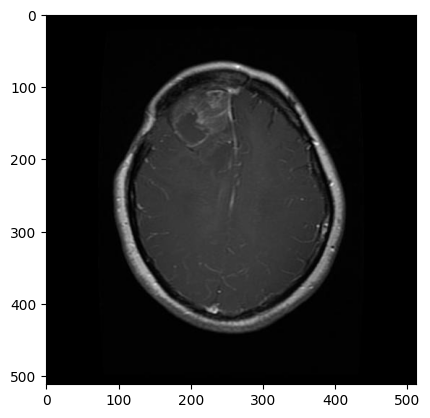

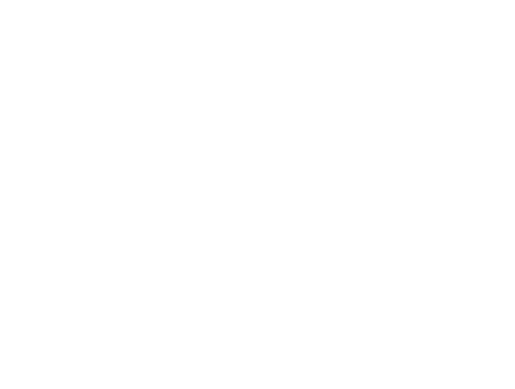

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = "Brain-Tumor-Classification-DataSet/Training/"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

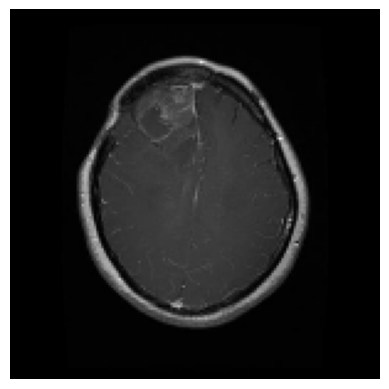

In [ ]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        print(path, len(os.listdir(path)))
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

Brain-Tumor-Classification-DataSet/Training/glioma_tumor 826
Brain-Tumor-Classification-DataSet/Training/meningioma_tumor 822
Brain-Tumor-Classification-DataSet/Training/no_tumor 395
Brain-Tumor-Classification-DataSet/Training/pituitary_tumor 827


In [ ]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0
X = X.reshape(-1,150,150,1)

(2870, 150, 150)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 150, 150, 1)
x_test shape (574, 150, 150, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 50
batch_size = 40
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,
        height_shift_range=0,
        horizontal_flip=True,
        vertical_flip=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step - accuracy: 0.3129 - loss: 1.3574 - val_accuracy: 0.5122 - val_loss: 1.0837
Epoch 2/50
 1/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6250 - loss: 1.1212

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 1.1212 - val_accuracy: 0.5279 - val_loss: 1.0720
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.5717 - loss: 1.0661 - val_accuracy: 0.5174 - val_loss: 1.1420
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 1.0971 - val_accuracy: 0.5348 - val_loss: 1.0696
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6325 - loss: 0.8979 - val_accuracy: 0.5854 - val_loss: 0.8993
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6750 - loss: 0.7845 - val_accuracy: 0.6359 - val_loss: 0.8604
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6651 - loss: 0.7828 - val_accuracy: 0.5714 - val_loss: 0.9600
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 0.8241 - val_accuracy: 0.5714 - val_loss: 0.9481
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6741 - loss: 0.7554 - val_accuracy: 0.7038 - val_loss: 0.699

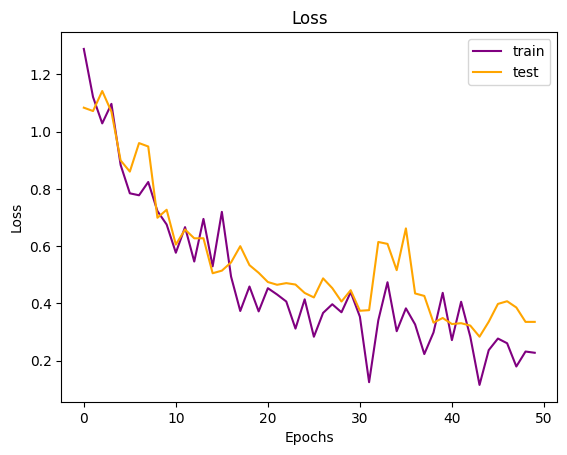

In [ ]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

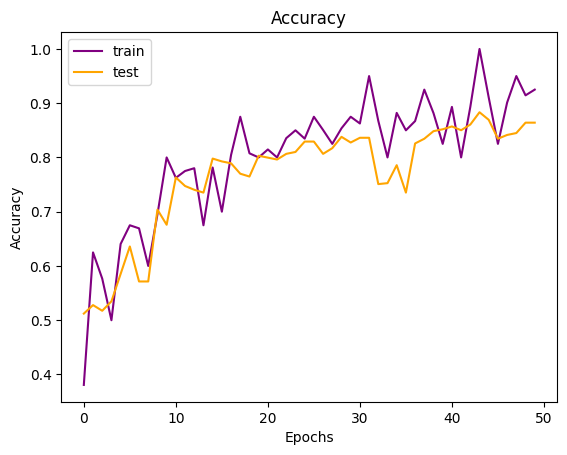

In [ ]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [ ]:
import json
import numpy as np

def testing(index):
  XX = np.resize(X_val[index], (150, 150))
  img = plt.imshow(XX)
  matrix_array = np.array(XX)
  reshaped_matrix = matrix_array.reshape(1, 150, 150, 1)
  json_data = {
    "instances": reshaped_matrix.tolist()
  }
  json_string = json.dumps(json_data, indent=2)
  with open('reshaped_matrix_data.json', 'w') as json_file:
    json_file.write(json_string)


  test = []
  test.append(X_val[index])
  test = np.array(test)
  y_pred = model.predict(test)
  print(y_pred)
  print('\n')
  print(Y_val[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
[[0.35443902 0.5567367  0.00503614 0.08378819]]


[0. 0. 0. 1.]


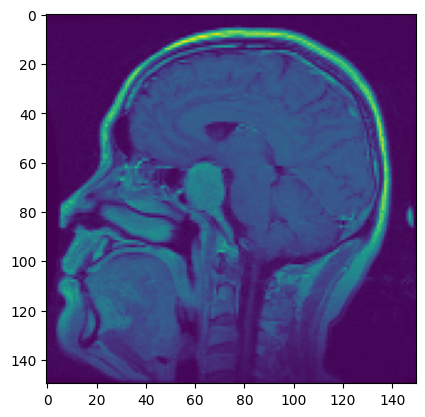

In [ ]:
testing(6)

In [ ]:
testing_data = []
dir = "Brain-Tumor-Classification-DataSet/Testing/"
def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(dir,category)
        print(path, len(os.listdir(path)))
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

Brain-Tumor-Classification-DataSet/Testing/glioma_tumor 100
Brain-Tumor-Classification-DataSet/Testing/meningioma_tumor 115
Brain-Tumor-Classification-DataSet/Testing/no_tumor 105
Brain-Tumor-Classification-DataSet/Testing/pituitary_tumor 74


In [ ]:
X1 = []
y1 = []
for features,label in testing_data:
    X1.append(features)
    y1.append(label)
X1 = np.array(X1).reshape(-1,IMG_SIZE,IMG_SIZE)
X1 = X1/255.0
X1= X1.reshape(-1,150,150,1)
print(X1.shape)

(394, 150, 150, 1)


In [ ]:
y1 = to_categorical(y1, num_classes = 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_test, X_1val, Y_test, Y_1val = train_test_split(X1, y1, test_size = 0.00001, random_state=42)
print("x_train shape",X_test.shape)
print("y_train shape",Y_test.shape)

x_train shape (393, 150, 150, 1)
y_train shape (393, 4)


In [ ]:
print(model.evaluate(X_test, Y_test))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5079 - loss: 2.3397
[2.2305915355682373, 0.5521628260612488]


In [ ]:
print(model.evaluate(X_train, Y_train))
print()
print(model.evaluate(X_val, Y_val))

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9258 - loss: 0.2094
[0.22181692719459534, 0.9115853905677795]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8738 - loss: 0.3143
[0.33529072999954224, 0.8641114830970764]


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_accuracy = 0
cvscores = []

# Perform cross-validation
for train, val in kfold.split(X):
    model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=0)

    scores = model.evaluate(X_val, Y_val, verbose=0)
    print(f'Validation accuracy: {scores[1]*100:.2f}%')
    cvscores.append(scores[1] * 100)
    if scores[1] > best_accuracy:
        best_accuracy = scores[1]
        best_model = model

print(f'Average validation accuracy: {np.mean(cvscores):.2f}% (+/- {np.std(cvscores):.2f}%)')

# After cross-validation, you can evaluate the model on the test set
if best_model is not None:
    print(f'\nBest model accuracy: {best_accuracy*100:.2f}%')
    # You can use the best_model for further evaluation or predictions on test data
    test_loss, test_accuracy = best_model.evaluate(X_test, Y_test)
    print(f'Test accuracy using the best model: {test_accuracy*100:.2f}%')
else:
    print('No best model found')
# test_loss, test_accuracy = model.evaluate(X_test, Y_test)
# print(f'Test accuracy: {test_accuracy*100:.2f}%')

Validation accuracy: 90.94%
Validation accuracy: 93.73%
Validation accuracy: 90.07%
Validation accuracy: 92.16%
Validation accuracy: 96.34%
Average validation accuracy: 92.65% (+/- 2.22%)

Best model accuracy: 96.34%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7069 - loss: 4.5656
Test accuracy using the best model: 71.25%


In [ ]:
best_model.evaluate(X_val, Y_val)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9764 - loss: 0.1313


[0.1975177377462387, 0.9634146094322205]

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model.keras')

# model.save('saved_model/my_model')

In [ ]:
!zip -r saved_model.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/my_model.keras (deflated 16%)


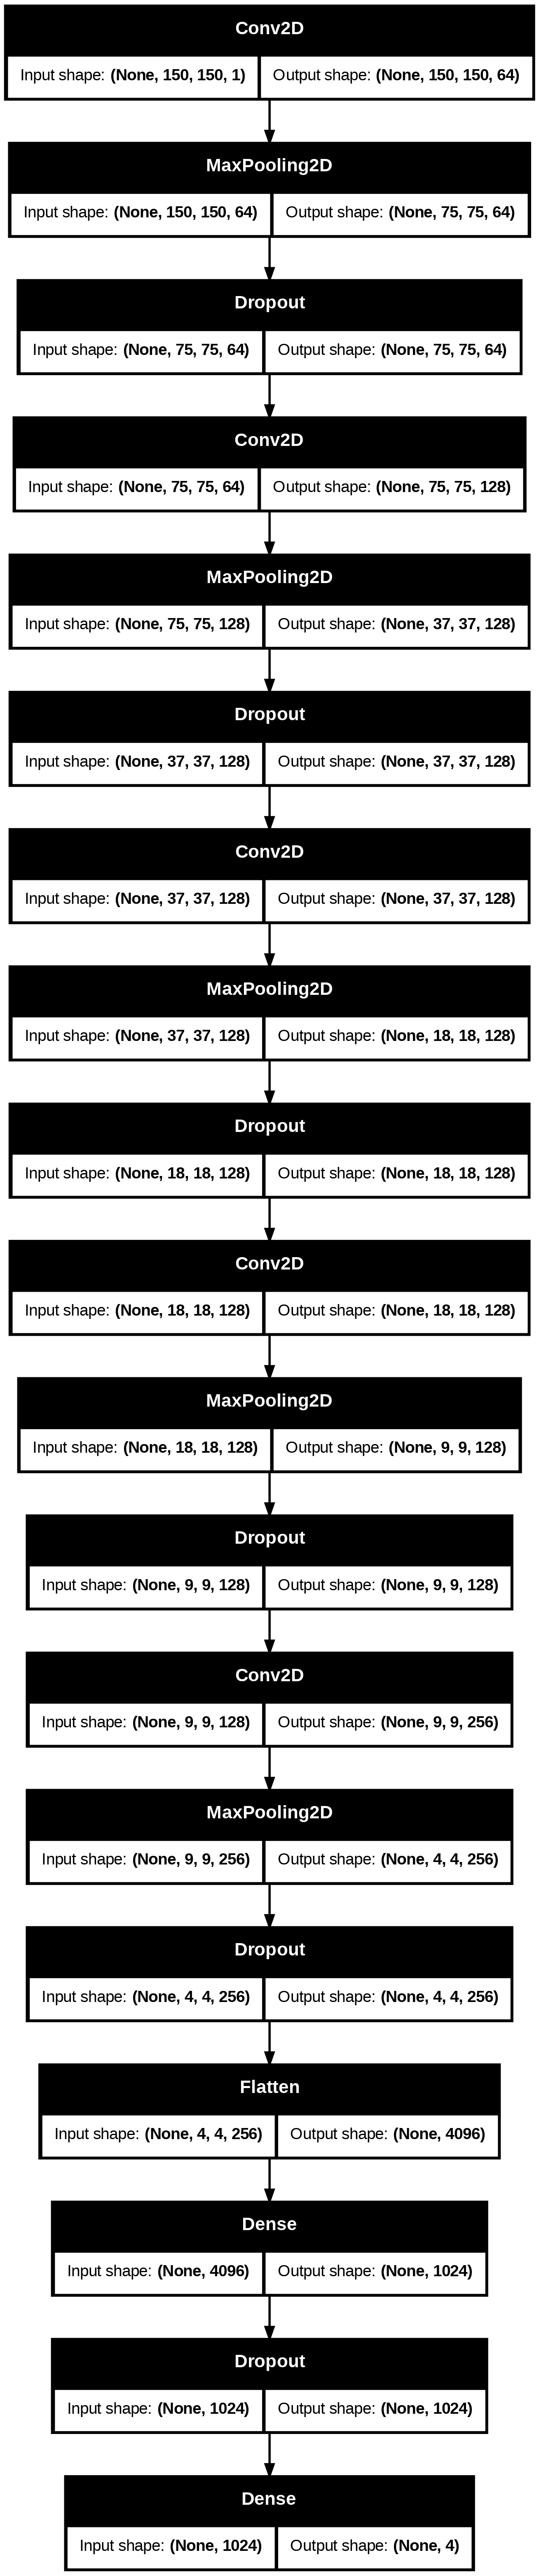

In [ ]:

from tensorflow.keras.utils import plot_model


# Save the summary as an image
plot_model(model, to_file='model_summary.png', show_shapes=True)


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model.keras')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 64)        │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 256)           │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,858,574 (52.87 MB)

 Trainable params: 4,619,524 (17.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,239,050 (35.24 MB)